In [275]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd
%matplotlib inline

In [276]:
from sklearn.datasets import make_classification

In [277]:
x,y = make_classification(n_samples=1000,n_features=10,n_classes=2,random_state=5)


In [278]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=1)

In [279]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression()


In [280]:
logistic.fit(x_train,y_train)

LogisticRegression()

In [281]:
y_pred = logistic.predict(x_test)

In [282]:
print(y_pred)

[1 1 1 1 1 0 1 0 1 1 0 1 0 0 1 1 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1
 0 0 0 1 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 1
 0 0 0 1 1 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1 1
 1 1 0 0 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1
 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1
 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0
 1 1 1 0 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 0 0 1 0 1 0 0 1 0 1 0
 1 0 1 1]


In [283]:
logistic.predict_proba(x_test)

array([[5.86821120e-02, 9.41317888e-01],
       [2.40412780e-01, 7.59587220e-01],
       [1.62484556e-03, 9.98375154e-01],
       [3.73732581e-02, 9.62626742e-01],
       [5.03418523e-03, 9.94965815e-01],
       [9.99938477e-01, 6.15226599e-05],
       [1.07693196e-02, 9.89230680e-01],
       [8.56613302e-01, 1.43386698e-01],
       [3.15521280e-01, 6.84478720e-01],
       [3.04236275e-03, 9.96957637e-01],
       [9.44567271e-01, 5.54327287e-02],
       [4.25596542e-02, 9.57440346e-01],
       [9.59542995e-01, 4.04570053e-02],
       [9.91351534e-01, 8.64846648e-03],
       [6.25208884e-02, 9.37479112e-01],
       [3.34875139e-01, 6.65124861e-01],
       [1.51338194e-04, 9.99848662e-01],
       [4.80950133e-02, 9.51904987e-01],
       [8.72101152e-01, 1.27898848e-01],
       [9.88166695e-01, 1.18333055e-02],
       [3.16121703e-01, 6.83878297e-01],
       [9.30933342e-01, 6.90666575e-02],
       [1.69740688e-02, 9.83025931e-01],
       [7.04381058e-01, 2.95618942e-01],
       [4.373353

In [284]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [285]:
score = accuracy_score(y_test,y_pred)
print(score)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

0.9233333333333333
[[145   5]
 [ 18 132]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       150
           1       0.96      0.88      0.92       150

    accuracy                           0.92       300
   macro avg       0.93      0.92      0.92       300
weighted avg       0.93      0.92      0.92       300



## Hyperparameter tuning

In [286]:
model = LogisticRegression(solver='saga', max_iter=10000)
params = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [100, 10, 1.0, 0.1, 0.01],
    'l1_ratio': [0.5]  # Required for 'elasticnet'
}


In [287]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold()

In [288]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=params, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

In [289]:
grid.fit(x_train,y_train)

c:\repos\Simple-Linear-Regression\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise',
             estimator=LogisticRegression(max_iter=10000, solver='saga'),
             n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01], 'l1_ratio': [0.5],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [290]:
print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)

Best Parameters: {'C': 1.0, 'l1_ratio': 0.5, 'penalty': 'l1'}
Best Score: 0.9085714285714286


In [291]:
best_model = grid.best_estimator_
y_pred = best_model.predict(x_test)


In [292]:
score = accuracy_score(y_test,y_pred)
print(score)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

0.9233333333333333
[[145   5]
 [ 18 132]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       150
           1       0.96      0.88      0.92       150

    accuracy                           0.92       300
   macro avg       0.93      0.92      0.92       300
weighted avg       0.93      0.92      0.92       300



In [293]:
from sklearn.model_selection import RandomizedSearchCV

In [294]:
model = LogisticRegression()
randomcv = RandomizedSearchCV(estimator=model, param_distributions=params,cv=5,scoring='accuracy')

In [295]:
randomcv.fit(x_train,y_train)

c:\repos\Simple-Linear-Regression\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
c:\repos\Simple-Linear-Regression\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
c:\repos\Simple-Linear-Regression\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
c:\repos\Simple-Linear-Regression\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
c:\repos\Simple-Linear-Regression\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got 

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.01],
                                        'l1_ratio': [0.5],
                                        'penalty': ['l1', 'l2', 'elasticnet']},
                   scoring='accuracy')

In [296]:
randomcv.best_score_

np.float64(0.9042857142857142)

In [297]:
randomcv.best_params_

{'penalty': 'l2', 'l1_ratio': 0.5, 'C': 100}

In [298]:
y_pred = randomcv.predict(x_test)

In [300]:
score = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.97      0.93       150
           1       0.96      0.88      0.92       150

    accuracy                           0.92       300
   macro avg       0.93      0.92      0.92       300
weighted avg       0.93      0.92      0.92       300



Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score: 0.802857142857143
Accuracy: 0.8666666666666667
Confusion Matrix:
 [[128  24]
 [ 16 132]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.84      0.86       152
           1       0.85      0.89      0.87       148

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300



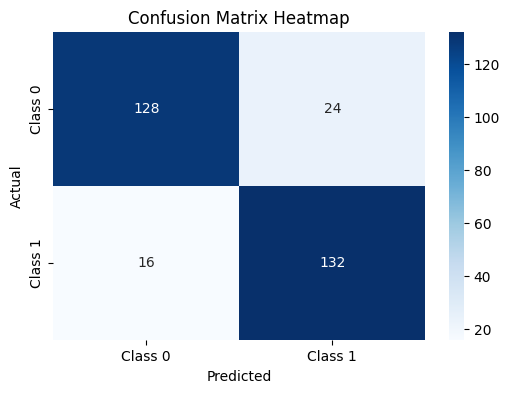

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Data Generation
x, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, flip_y=0.1, random_state=5)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1, stratify=y)

# Hyperparameter Grid with Valid Combinations
params = [
    {'penalty': ['l1'], 'C': [100, 10, 1.0, 0.1, 0.01], 'solver': ['liblinear']},
    {'penalty': ['l2'], 'C': [100, 10, 1.0, 0.1, 0.01], 'solver': ['liblinear', 'saga']},
    {'penalty': ['elasticnet'], 'C': [100, 10, 1.0, 0.1, 0.01], 'solver': ['saga'], 'l1_ratio': [0.5]}
]

# Grid Search
model = LogisticRegression(max_iter=10000)
cv = StratifiedKFold()
grid = GridSearchCV(estimator=model, param_grid=params, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise', verbose=2)
grid.fit(x_train, y_train)

# Evaluation
print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)

y_pred = grid.predict(x_test)
score = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", score)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()
